<a href="https://colab.research.google.com/github/Jhonatabz/matematica-computacional-cc-2025/blob/main/matematica_computacional_atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão Linear Simples: Ajustando o Intercept

Nesta primeira etapa, foi simulado o treinamento de um modelo simples onde  a inclinação da reta (slope) foi fixada tentando encontrar o melhor ponto onde a reta corta o eixo Y (intercept). Utilizando o método do Gradiente Descendente para minimizar a diferença entre os pesos reais e os previstos.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Funções Auxiliares
def d_intercept(intercept, slope):
  previsao = intercept + slope * alturas
  residuos = pesos_reais - previsao
  derivada = np.sum(-2 * residuos)
  return derivada

def d_slope(intercept, slope):
  previsao = intercept + slope * alturas
  residuos = pesos_reais - previsao
  derivada = np.sum(-2 * alturas * residuos)
  return derivada

--------------- INICIO ---------------
ITERACAO 1:
  Derivada: -5.704
  Passo: -0.570
  Velho Intercept: 0.000 | Novo: 0.570
---
ITERACAO 2:
  Derivada: -2.282
  Passo: -0.228
  Velho Intercept: 0.570 | Novo: 0.799
---
ITERACAO 3:
  Derivada: -0.913
  Passo: -0.091
  Velho Intercept: 0.799 | Novo: 0.890
---

>>> CONDIÇÃO DE PARADA ATINGIDA: Precisão (0.001) alcançada na iteração 8.
Intercept Final Otimizado: 0.9491, Numero de iterações: 8
--------------- FIM ---------------


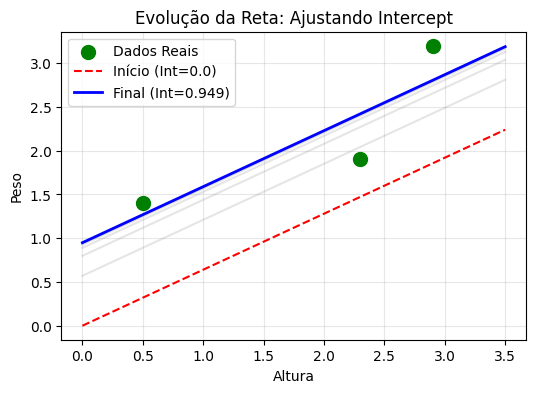

In [22]:
alturas = np.array([0.5, 2.3, 2.9])
pesos_reais = np.array([1.4, 1.9, 3.2])

intercept = 0.0
slope = 0.64
learning_rate = 0.1

historico_intercept = [intercept]

max_iteracoes = 50
precisao = 0.001
contador = 1

print(f'{"-"*15} INICIO {"-"*15}')

#Loop de minimização
while contador <= max_iteracoes:

  derivada = d_intercept(intercept, slope)

  passo = derivada * learning_rate

  if abs(passo) < precisao:
    print(f'\n>>> CONDIÇÃO DE PARADA ATINGIDA: Precisão ({precisao}) alcançada na iteração {contador}.')
    break

  old_intercept = intercept

  intercept = intercept - passo
  historico_intercept.append(intercept)

  if contador <= 3:
    print(f"ITERACAO {contador}:")
    print(f"  Derivada: {derivada:.3f}")
    print(f"  Passo: {passo:.3f}")
    print(f"  Velho Intercept: {old_intercept:.3f} | Novo: {intercept:.3f}")

    print("---")

  contador += 1

  if contador > max_iteracoes:
    print(f'\n>>> CONDIÇÃO DE PARADA ATINGIDA: Máximo de iterações ({max_iteracoes}) finalizado.')

print(f"Intercept Final Otimizado: {intercept:.4f}, Numero de iterações: {contador}")
print(f'{"-"*15} FIM {"-"*15}')

# Plotagem
plt.figure(figsize=(6, 4))

plt.scatter(alturas, pesos_reais, color='green', s=100, label='Dados Reais', zorder=5)

x_range = np.linspace(0, 3.5, 100)
for i in historico_intercept:
  y = i + slope * x_range

  if i == historico_intercept[-1]:
    plt.plot(x_range, y, color='blue', linewidth=2, label=f'Final (Int={i:.3f})')
  elif i == historico_intercept[0]:
    plt.plot(x_range, y, color='red', linestyle='--', label=f'Início (Int={i})')
  else:
    plt.plot(x_range, y, color='grey', alpha=0.2, zorder=2)

plt.title('Evolução da Reta: Ajustando Intercept')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Análise da Taxa de Aprendizado (Learning Rate)

Aqui foi analisado como o tamanho do passo (learning_rate) afeta a descida do erro. Se o passo for muito grande, podemos "pular" o mínimo ideal. Se for muito pequeno, demoramos muito para chegar lá. O gráfico mostra a "curva de custo" (formato de parábola) e como o algoritmo caminha sobre ela.

In [23]:
# Funções Auxiliares

def calcular_erro(historico_intercepts):
  historico_erros = []
  for intercept in historico_intercepts:
    previsoes = intercept + slope * alturas
    residuos = pesos_reais - previsoes
    ssr = np.sum(residuos ** 2)
    historico_erros.append(ssr)
  return historico_erros

def rodar_gradiente(learning_rate, iteracoes=10):
    intercept = 0.0
    historico_intercepts = [intercept]

    for _ in range(iteracoes):
      previsao = intercept + slope * alturas
      residuos = pesos_reais - previsao
      derivada = np.sum(-2 * residuos)

      passo = derivada * learning_rate
      intercept = intercept - passo

      historico_intercepts.append(intercept)
    return historico_intercepts


def plotar_curva_custo(caminho_x, caminho_y, cor, lr):
  plt.figure(figsize=(6, 4))
  x_base = np.linspace(-0.5, 2.5, 100)
  y_base = calcular_erro(x_base)
  plt.plot(x_base, y_base, color='black', alpha=0.3, label='Curva de Custo (SSR)')

  plt.plot(caminho_x, caminho_y, color=cor, linestyle='--', alpha=0.5)
  plt.scatter(caminho_x, caminho_y, color=cor, s=60, label='Estado Atual')

  plt.title(f'Learning Rate: {lr}:')
  plt.xlabel('Valor do Intercept')
  plt.ylabel('Erro Total (SSR)')
  plt.legend()
  plt.grid(True, alpha=0.5)
  plt.show()

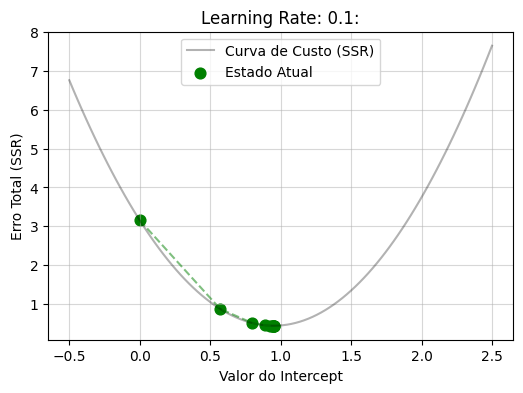

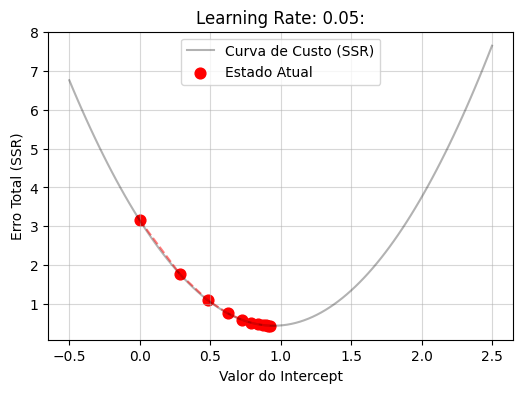

In [24]:
# Testando ambas Taxas de Aprendizado
learning_rates = [0.1, 0.05]
cores = ['green', 'red']

for lr, cor in zip(learning_rates, cores):
  caminho_x = rodar_gradiente(lr)
  caminho_y = calcular_erro(caminho_x)
  plotar_curva_custo(caminho_x, caminho_y, cor=cor, lr=lr)


Regressão Completa: Intercepto e Slope

Agora otimizando dois parâmetros simultaneamente: onde a reta começa (intercept) e qual sua inclinação (slope). Calculando as derivadas parciais para cada um e atualizando ambos a cada iteração. O resultado é um ajuste muito mais preciso aos dados reais.

--------------- INICIO ---------------
ITERACAO 1:
  Derivada Intercept: -1.600
  Passo Intercept: -0.016
  Velho Intercept: 0.000 | Novo: 0.016
  Novo Intercept: 0.016
  
  Derivada Slope: -0.800
  Passo Slope: -0.008
  Velho Slope: 1.000 | Novo: 1.008
---
ITERACAO 2:
  Derivada Intercept: -1.413
  Passo Intercept: -0.014
  Velho Intercept: 0.016 | Novo: 0.030
  Novo Intercept: 0.030
  
  Derivada Slope: -0.394
  Passo Slope: -0.004
  Velho Slope: 1.008 | Novo: 1.012
---
ITERACAO 3:
  Derivada Intercept: -1.283
  Passo Intercept: -0.013
  Velho Intercept: 0.030 | Novo: 0.043
  Novo Intercept: 0.043
  
  Derivada Slope: -0.123
  Passo Slope: -0.001
  Velho Slope: 1.012 | Novo: 1.013
---

>>> CONDIÇÃO DE PARADA ATINGIDA: Máximo de iterações (50) finalizado.
--------------- FIM ---------------
Intercept Final Otimizado: 0.4239
Slope Final Otimizado: 0.4239


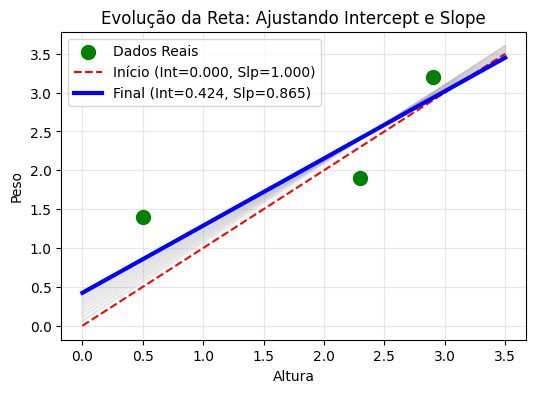

In [25]:
intercept = 0.0
slope = 1.0
learning_rate = 0.01

historico_intercept = [intercept]
historico_slope = [slope]

max_iteracoes = 50
precisao = 0.001
contador = 1

print(f'{"-"*15} INICIO {"-"*15}')

#Loop de minimização
while contador <= max_iteracoes:

  derivada_intercept = d_intercept(intercept, slope)
  derivada_slope = d_slope(intercept, slope)

  passo_intercept = derivada_intercept * learning_rate
  passo_slope = derivada_slope * learning_rate

  if abs(passo_intercept) < precisao:
    print(f'\n>>> CONDIÇÃO DE PARADA ATINGIDA: Precisão ({precisao}) alcançada na iteração {contador}.')
    break

  old_intercept = intercept
  intercept = intercept - passo_intercept
  old_slope = slope
  slope = slope - passo_slope

  historico_intercept.append(intercept)
  historico_slope.append(slope)
  if contador <= 3:
    print(f"ITERACAO {contador}:")
    print(f"  Derivada Intercept: {derivada_intercept:.3f}")
    print(f"  Passo Intercept: {passo_intercept:.3f}")
    print(f"  Velho Intercept: {old_intercept:.3f} | Novo: {intercept:.3f}")

    print(f"  Novo Intercept: {intercept:.3f}")
    print("  ")
    print(f"  Derivada Slope: {derivada_slope:.3f}")
    print(f"  Passo Slope: {passo_slope:.3f}")
    print(f"  Velho Slope: {old_slope:.3f} | Novo: {slope:.3f}")

    print("---")
  contador += 1

  if contador > max_iteracoes:
    print(f'\n>>> CONDIÇÃO DE PARADA ATINGIDA: Máximo de iterações ({max_iteracoes}) finalizado.')
    break

print(f'{"-"*15} FIM {"-"*15}')
print(f"Intercept Final Otimizado: {intercept:.4f}")
print(f"Slope Final Otimizado: {intercept:.4f}")

#Plotagem
plt.figure(figsize=(6, 4))

plt.scatter(alturas, pesos_reais, color='green', s=100, label='Dados Reais', zorder=5)

x_range = np.linspace(0, 3.5, 100)
for i, (intp, slp) in enumerate(zip(historico_intercept, historico_slope)):

    y = intp + slp * x_range

    if i == len(historico_intercept) - 1:
      plt.plot(x_range, y, color='blue', linewidth=3, zorder=4,
                 label=f'Final (Int={intp:.3f}, Slp={slp:.3f})')

    elif i == 0:
      plt.plot(x_range, y, color='red', linestyle='--', zorder=3,
                 label=f'Início (Int={intp:.3f}, Slp={slp:.3f})')

    elif i % 5 == 0:
      plt.plot(x_range, y, color='gray', alpha=0.2, zorder=2)

plt.title('Evolução da Reta: Ajustando Intercept e Slope')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Gradiente Descendente Estocástico (SGD)

Diferente do método anterior que olhava todos os dados de uma vez (Batch), o Estocástico atualiza a reta olhando um dado por vez (escolhido aleatoriamente). Isso faz o aprendizado ser mais "ruidoso" e oscilante, mas é muito mais rápido computacionalmente para grandes volumes de dados.

Iniciando Gradiente Descendente Estocástico 

--------------- PRIMEIRO CICLO ---------------
PONTO 1:
  Derivada Intercept: 0.800
  Passo Intercept: 0.008
  Velho Intercept: 0.000 | Novo: -0.008
  
  Derivada Slope: 1.840
  Passo Slope: 0.018
  Velho Slope: 1.000 | Novo: 0.982
---
PONTO 0:
  Derivada Intercept: -1.834
  Passo Intercept: -0.018
  Velho Intercept: -0.008 | Novo: 0.010
  
  Derivada Slope: -0.917
  Passo Slope: -0.009
  Velho Slope: 0.982 | Novo: 0.991
---
PONTO 2:
  Derivada Intercept: -0.633
  Passo Intercept: -0.006
  Velho Intercept: 0.010 | Novo: 0.017
  
  Derivada Slope: -1.835
  Passo Slope: -0.018
  Velho Slope: 0.991 | Novo: 1.009
---
--------------- FIM DO CICLO ---------------

>>> CONDIÇÃO DE PARADA ATINGIDA: Máximo de ciclos (50) finalizado.
Intercept Final Otimizado: 0.2076
Slope Final Otimizado: 0.2076


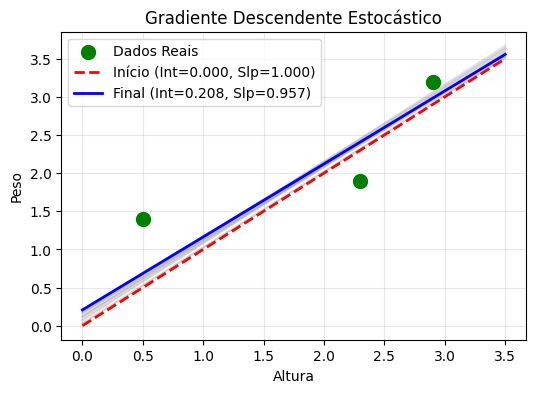

In [26]:
intercept = 0.0
slope = 1.0
learning_rate = 0.01

ciclos = 20

historico_intercept = [intercept]
historico_slope = [slope]

print(f"Iniciando Gradiente Descendente Estocástico \n")

#Loop de minimização
for ciclo in range(ciclos):
  indices = np.random.permutation(len(alturas))

  if ciclo == 0:
    print(f'{"-"*15} PRIMEIRO CICLO {"-"*15}')

  for i in indices:
    x = alturas[i]
    y = pesos_reais[i]

    previsao = intercept + slope * x
    residuo = y - previsao

    d_intercept = -2 * residuo
    d_slope = - 2 * x * residuo

    passo_intercept = d_intercept * learning_rate
    passo_slope = d_slope * learning_rate

    old_intercept = intercept
    intercept = intercept - passo_intercept
    old_slope = slope
    slope = slope - passo_slope

    historico_intercept.append(intercept)
    historico_slope.append(slope)

    if ciclo == 0:
      print(f"PONTO {i}:")
      print(f"  Derivada Intercept: {d_intercept:.3f}")
      print(f"  Passo Intercept: {passo_intercept:.3f}")
      print(f"  Velho Intercept: {old_intercept:.3f} | Novo: {intercept:.3f}")
      print("  ")
      print(f"  Derivada Slope: {d_slope:.3f}")
      print(f"  Passo Slope: {passo_slope:.3f}")
      print(f"  Velho Slope: {old_slope:.3f} | Novo: {slope:.3f}")
      print("---")

print(f'{"-"*15} FIM DO CICLO {"-"*15}')

print(f'\n>>> CONDIÇÃO DE PARADA ATINGIDA: Máximo de ciclos ({max_iteracoes}) finalizado.')
print(f"Intercept Final Otimizado: {intercept:.4f}")
print(f"Slope Final Otimizado: {intercept:.4f}")

#Plotagem
plt.figure(figsize=(6, 4))

plt.scatter(alturas, pesos_reais, color='green', s=100, label='Dados Reais', zorder=5)

x_range = np.linspace(0, 3.5, 100)
for i, (intp, slp) in enumerate(zip(historico_intercept, historico_slope)):
  y = intp + slp * x_range

  if i == len(historico_intercept) - 1:
    plt.plot(x_range, y, color='blue', linewidth=2, zorder=4,
             label=f'Final (Int={intp:.3f}, Slp={slp:.3f})')

  elif i == 0:
    plt.plot(x_range, y, color='red', linestyle='--', linewidth=2, zorder=3,
             label=f'Início (Int={intp:.3f}, Slp={slp:.3f})')

  elif i % 5 == 0:
    plt.plot(x_range, y, color='gray', alpha=0.2, zorder=2)

plt.title('Gradiente Descendente Estocástico')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Mini-Batch Gradient Descent

O Mini-Batch é o "caminho do meio". Ele não usa todos os dados (lento), nem apenas um (muito instável). Ele pega pequenos grupos (lotes ou batches) de dados para calcular a atualização.

Iniciando Mini-Batch Gradient Descent (Batch Size: 2)

------------- PRIMEIRO CICLO -------------
BATCH (índices [2 1]):
  Velho Intercept: 0.000 | Novo: -0.001
  Velho Slope:     1.000 | Novo: 1.000
---
BATCH (índices [0]):
  Velho Intercept: -0.001 | Novo: 0.017
  Velho Slope:     1.000 | Novo: 1.009
---
--------------- FIM DO TREINAMENTO ---------------

>>> CONDIÇÃO DE PARADA ATINGIDA: 30 ciclos.
Intercept Final Otimizado: 0.1966
Slope Final Otimizado:     0.9549


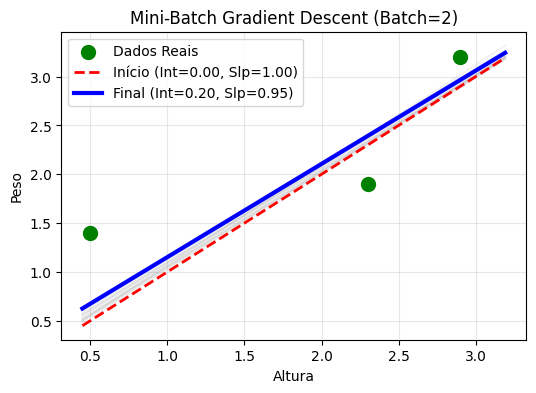

In [27]:

intercept = 0.0
slope = 1.0
learning_rate = 0.01
ciclos = 30
batch_size = 2

historico_intercept = [intercept]
historico_slope = [slope]

print(f"Iniciando Mini-Batch Gradient Descent (Batch Size: {batch_size})\n")

#loop de minimização
for ciclo in range(ciclos):
    indices = np.random.permutation(len(alturas))

    if ciclo == 0:
        print(f'------------- PRIMEIRO CICLO -------------')

    for i in range(0, len(alturas), batch_size):
        indices_batch = indices[i : i + batch_size]

        x_batch = alturas[indices_batch]
        y_batch = pesos_reais[indices_batch]

        previsao = intercept + slope * x_batch

        residuo = y_batch - previsao

        d_intercept = -2 * np.mean(residuo)

        d_slope = -2 * np.mean(x_batch * residuo)

        passo_intercept = d_intercept * learning_rate
        passo_slope = d_slope * learning_rate

        old_intercept = intercept
        intercept = intercept - passo_intercept

        old_slope = slope
        slope = slope - passo_slope

        historico_intercept.append(intercept)
        historico_slope.append(slope)

        if ciclo == 0:
            print(f"BATCH (índices {indices_batch}):")
            print(f"  Velho Intercept: {old_intercept:.3f} | Novo: {intercept:.3f}")
            print(f"  Velho Slope:     {old_slope:.3f} | Novo: {slope:.3f}")
            print("---")

print(f'{"-"*15} FIM DO TREINAMENTO {"-"*15}')

print(f'\n>>> CONDIÇÃO DE PARADA ATINGIDA: {ciclos} ciclos.')
print(f"Intercept Final Otimizado: {intercept:.4f}")
print(f"Slope Final Otimizado:     {slope:.4f}")

# Plotagem
plt.figure(figsize=(6, 4))

plt.scatter(alturas, pesos_reais, color='green', s=100, label='Dados Reais', zorder=5)

x_range = np.linspace(min(alturas)*0.9, max(alturas)*1.1, 100)

for i, (intp, slp) in enumerate(zip(historico_intercept, historico_slope)):
    y = intp + slp * x_range

    if i == len(historico_intercept) - 1:
        plt.plot(x_range, y, color='blue', linewidth=3, zorder=4,
                 label=f'Final (Int={intp:.2f}, Slp={slp:.2f})')

    elif i == 0:
        plt.plot(x_range, y, color='red', linestyle='--', linewidth=2, zorder=3,
                 label=f'Início (Int={intp:.2f}, Slp={slp:.2f})')
    else:
        if i % 5 == 0:
            plt.plot(x_range, y, color='gray', alpha=0.1, zorder=2)

plt.title(f'Mini-Batch Gradient Descent (Batch={batch_size})')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Rede Neural: Otimização de um Único Parâmetro (b3)

Antes de treinar toda a rede, com apenas um parâmetro otimizado: o viés da camada de saída (b3). Todos os outros pesos foram fixados. Isso ajuda a entender o impacto isolado de um único ajuste no erro total da rede, usando uma função de ativação Softplus para introduzir a não-linearidade.

In [28]:
def softplus(x):
    """Função de ativação Softplus: log(1 + e^x)"""
    return np.log(1 + np.exp(x))

def run_gradient_descent():
    inputs = np.array([0.0, 0.5, 1.0])

    valores_observados = np.array([0.0, 1.0, 0.0])

    # Pesos e Viés Fixos da Rede Neural (Extraídos dos slides)
    w1 = 3.34
    b1 = -1.43
    w_out1 = -1.22

    w2 = -3.53
    b2 = 0.57
    w_out2 = -2.30

    b3 = 0.0
    learning_rate = 0.1

    print(f"{'Iteração':<10} | {'velho b3':<10} | {'Slope':<12} | {'Passo':<10} | {'Novo b3':<10}")
    print("-" * 65)

    for i in range(10):
        old_b3 = b3

        # Forward Pass
        feat1 = softplus((inputs * w1) + b1) * w_out1
        feat2 = softplus((inputs * w2) + b2) * w_out2

        previsao = feat1 + feat2 + b3

        # Backward Pass
        residuos = valores_observados - previsao
        slope = np.sum(-2 * residuos)

        # Passo de Atualização
        passo = slope * learning_rate

        new_b3 = old_b3 - passo

        b3 = new_b3

        print(f"{i:<10} | {old_b3:<10.3f} | {slope:<12.3f} | {passo:<10.3f} | {new_b3:<10.3f}")

        # Condição de parada simples
        if abs(passo) < 0.0001:
            print("-" * 65)
            print("Convergiu!")
            break

    run_gradient_descent()

Rede Neural: Backpropagation Completo (Todos os Pesos)

Nesta etapa final, a lógica para treinar múltiplos pesos é expandida (w3, w4, b3) simultaneamente. O Backpropagation (Regra da Cadeia) é usado para calcular como o erro final se propaga de volta para ajustar cada peso individualmente.

In [29]:
# Dados de entrada e Saída Esperada
inputs = np.array([0, 0.5, 1])
observado = np.array([0, 1, 0])

# Pesos e Vieses fixos
w1, b1 = 3.34, -1.43
w2, b2 = -3.53, 0.57

# Pesos e Vieses
w3 = 0.36
w4 = 0.63
b3 = 0.00

learning_rate = 0.1

def softplus(x):
    return np.log(1 + np.exp(x))

def forward_pass(input_vals):
    # Nó 1
    x1 = (input_vals * w1) + b1
    y1 = softplus(x1)

    # Nó 2
    x2 = (input_vals * w2) + b2
    y2 = softplus(x2)

    previsao = (y1 * w3) + (y2 * w4) + b3

    return previsao, y1, y2

print(f"{'CICLO':<6} | {'PARAMETRO':<5} | {'VALOR VELHO':<10} | {'PASSO':<10} | {'VALOR NOVO':<10}")
print("-" * 65)

max_ciclos = 1000
tolerancia = 0.00001
prev_ssr = float('inf')

for ciclo in range(max_ciclos):

    previsao, y1, y2 = forward_pass(inputs)

    # Cálculo do Erro
    residuos = observado - previsao
    ssr = np.sum(residuos ** 2)

    # Cálculo dos Gradientes
    d_ssr_d_pred = -2 * residuos

    # Derivadas em relação aos pesos
    d_ssr_dw3 = np.sum(d_ssr_d_pred * y1)

    d_ssr_dw4 = np.sum(d_ssr_d_pred * y2)

    d_ssr_db3 = np.sum(d_ssr_d_pred * 1)

    # Passo de Atualização
    step_w3 = d_ssr_dw3 * learning_rate
    step_w4 = d_ssr_dw4 * learning_rate
    step_b3 = d_ssr_db3 * learning_rate

    # Armazenar valores antigos para impressão
    old_w3, old_w4, old_b3 = w3, w4, b3

    w3 = old_w3 - step_w3
    w4 = old_w4 - step_w4
    b3 = old_b3 - step_b3

    if ciclo == 0 or ciclo % 100 == 0:
        print(f"{ciclo:<6} | w3    | {old_w3:<10.4f} | {step_w3:<10.4f} | {w3:<10.4f}")
        print(f"{'':<6} | w4    | {old_w4:<10.4f} | {step_w4:<10.4f} | {w4:<10.4f}")
        print(f"{'':<6} | b3    | {old_b3:<10.4f} | {step_b3:<10.4f} | {b3:<10.4f}")
        print(f"{'':<6} | SSR   | {ssr:.4f}")
        print("-" * 65)

    # Checagem de convergência (parada se o erro mudar muito pouco)
    if abs(prev_ssr - ssr) < tolerancia:
        print(f"Convergiu na época {ciclo}!")
        break
    prev_ssr = ssr

print("\n--- RESULTADO FINAL APÓS TREINAMENTO ---")
print(f"w3 Final: {w3:.4f}")
print(f"w4 Final: {w4:.4f}")
print(f"b3 Final: {b3:.4f}")

# Validação com os dados de entrada
final_preds, _, _ = forward_pass(inputs)
print("\nValidação:")
for i, val in enumerate(inputs):
    print(f"Input: {val} -> Predito: {final_preds[i]:.4f} (Esperado: {observado[i]})")

CICLO  | PARAMETRO | VALOR VELHO | PASSO      | VALOR NOVO
-----------------------------------------------------------------
0      | w3    | 0.3600     | 0.2576     | 0.1024    
       | w4    | 0.6300     | 0.1257     | 0.5043    
       | b3    | 0.0000     | 0.1900     | -0.1900   
       | SSR   | 1.3977
-----------------------------------------------------------------
100    | w3    | -0.7332    | 0.0053     | -0.7385   
       | w4    | -1.3853    | 0.0102     | -1.3955   
       | b3    | 1.6854     | -0.0102    | 1.6956    
       | SSR   | 0.1065
-----------------------------------------------------------------
200    | w3    | -1.0572    | 0.0018     | -1.0590   
       | w4    | -2.0019    | 0.0033     | -2.0052   
       | b3    | 2.3038     | -0.0034    | 2.3072    
       | SSR   | 0.0115
-----------------------------------------------------------------
300    | w3    | -1.1637    | 0.0006     | -1.1643   
       | w4    | -2.2045    | 0.0011     | -2.2056   
       | b3